In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
file_path = '/Users/mahinbindra/Downloads/SMM921_trading_data_2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
data.head()


,Stock,Date-Time,Last,Volume,No. Trades,Close Bid,Close Ask,Close Bid Size,Close Ask Size
0,AAL.L,2024-01-08T05:00:00.000000000Z,NaN,NaN,NaN,1850.0,2000.0,250.0,5000.0
1,AAL.L,2024-01-08T07:50:00.000000000Z,NaN,NaN,NaN,2244.5,1496.8,1828.0,2856.0
2,AAL.L,2024-01-08T07:51:00.000000000Z,NaN,NaN,NaN,2244.5,1496.8,1828.0,2946.0
3,AAL.L,2024-01-08T07:52:00.000000000Z,NaN,NaN,NaN,2244.5,1496.8,2059.0,2946.0
4,AAL.L,2024-01-08T07:53:00.000000000Z,NaN,NaN,NaN,2244.5,1496.8,1884.0,4639.0


In [18]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Stock,571648,20,ULVR.L,28954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date-Time,571648,NaN,NaN,NaN,2024-02-17 06:42:19.673435904+00:00,2024-01-08 08:15:00+00:00,2024-01-26 13:52:00+00:00,2024-02-16 11:56:00+00:00,2024-03-08 10:07:00+00:00,2024-03-28 16:25:00+00:00,NaN
Last,463807.0,NaN,NaN,NaN,1587.357011,41.0095,243.8,1036.5,2466.421,5688.0,1514.431643
Volume,480282.0,NaN,NaN,NaN,33540.842819,0.0,555.0,2078.0,8600.0,201606713.0,809360.769895
No. Trades,463807.0,NaN,NaN,NaN,12.143823,1.0,3.0,7.0,15.0,1131.0,17.861168
Close Bid,571648.0,NaN,NaN,NaN,1575.379649,41.005,274.2,1520.6,2422.0,5686.0,1448.832233
Close Ask,571648.0,NaN,NaN,NaN,1576.122285,41.015,274.4,1521.0,2423.0,5688.0,1449.309477
Close Bid Size,571648.0,NaN,NaN,NaN,3582.85606,1.0,407.0,1139.0,3722.0,513457.0,7293.299045
Close Ask Size,571648.0,NaN,NaN,NaN,3244.04133,1.0,374.0,1055.0,3376.0,696239.0,6184.866124
mid,571648.0,NaN,NaN,NaN,1575.750967,41.01,274.3,1520.8,2422.5,5687.0,1449.070827


In [17]:
data.dtypes

Stock                          object
Date-Time         datetime64[ns, UTC]
Last                          float64
Volume                        float64
No. Trades                    float64
Close Bid                     float64
Close Ask                     float64
Close Bid Size                float64
Close Ask Size                float64
mid                           float64
spread                        float64
depth                         float64
dtype: object

In [8]:
# Convert the Date-Time column to datetime format
data['Date-Time'] = pd.to_datetime(data['Date-Time'])

In [9]:
# Create the mElapsed column to filter times
data['mElapsed'] = data['Date-Time'].dt.hour * 60 + data['Date-Time'].dt.minute

In [10]:
# Filter for times between 8:15 and 16:25
data = data[(data['mElapsed'] > 8 * 60 + 15 - 1) & (data['mElapsed'] < 16.5 * 60 - 4)]
data = data.drop(columns=['mElapsed'])

In [11]:
# Calculate mid, spread, and depth
data['mid'] = 0.5 * (data['Close Bid'] + data['Close Ask'])
data['spread'] = 10000 * (data['Close Ask'] - data['Close Bid']) / data['mid']
data['depth'] = 0.5 * (data['Close Ask Size'] + data['Close Bid Size'])

In [12]:
# Filter out rows with non-positive spread
data = data[data['spread'] > 0]

In [13]:
# Get the list of unique stock identifiers, excluding the first three and last three
unique_stocks = data['Stock'].unique()
selected_stocks = np.random.choice(unique_stocks[3:-3], 3, replace=False)

In [16]:
selected_stocks

array(['BNZL.L', 'CPG.L', 'TW.L'], dtype=object)

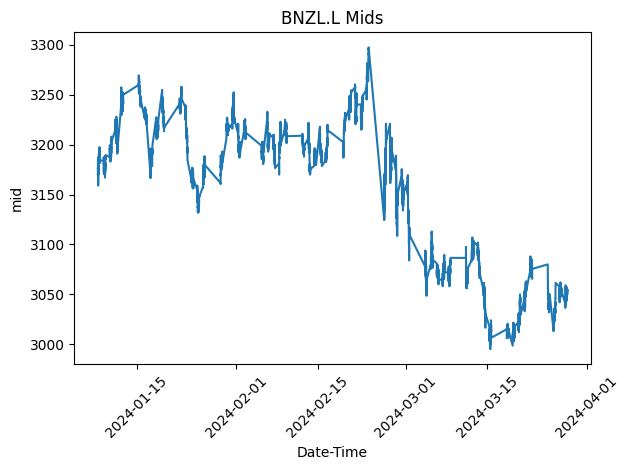

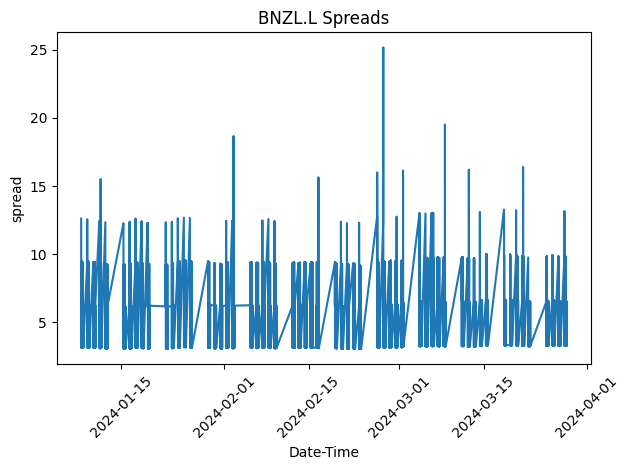

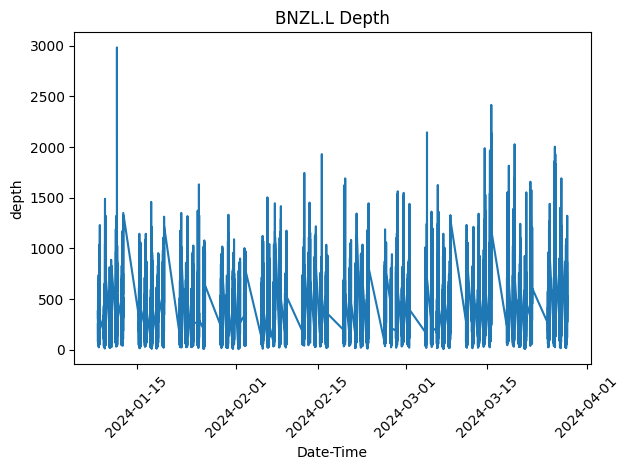

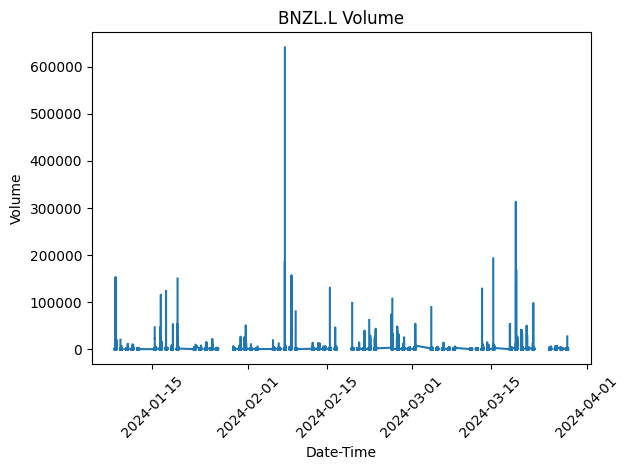

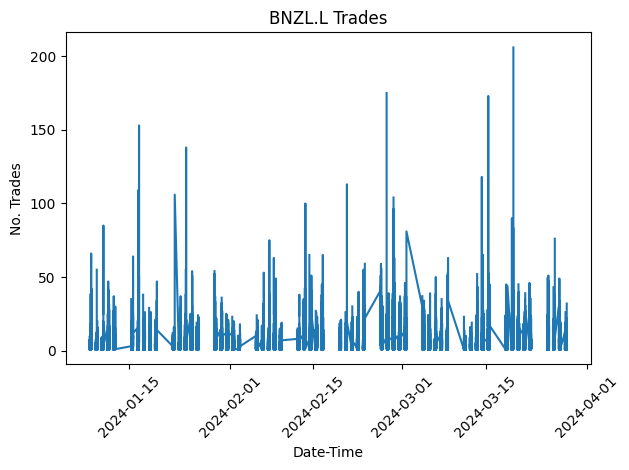

TypeError: Could not convert BNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.LBNZL.L to numeric

In [15]:
#Iterate over each selected stock to perform the analysis
for myStock in selected_stocks:
    stock_data = data[data['Stock'] == myStock]
    
    # Calculate ADV and ADT
    adv = stock_data['Volume'].sum() / len(stock_data['Date-Time'].dt.date.unique())
    adt = stock_data['No. Trades'].sum() / len(stock_data['Date-Time'].dt.date.unique())
    
    # Plot the mid, spread, depth, volume, and trades
    for column, title in zip(['mid', 'spread', 'depth', 'Volume', 'No. Trades'],
                             ['Mids', 'Spreads', 'Depth', 'Volume', 'Trades']):
        plt.plot(stock_data['Date-Time'], stock_data[column])
        plt.title(f"{myStock} {title}")
        plt.xlabel('Date-Time')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        plt.close()
    
    # Calculate hourly means for spread and depth
    hourlyMeans = stock_data.groupby(stock_data['Date-Time'].dt.hour).mean()
    
    # Plot the hourly mean spread and depth as a percentage of ADV
    for column, title, ylabel in zip(['spread', 'depth', 'Volume', 'No. Trades'],
                                     ['Hourly Mean Spreads', 'Hourly Mean Depth as percentage of ADV', 'Hourly Mean Volume as percentage of ADV', 'Hourly Mean Trades as percentage of ADT'],
                                     ['spread', f'100*depth/adv', f'100*Volume*60/adv', f'100*No. Trades*60/adt']):
        plt.plot(hourlyMeans.index, hourlyMeans[column])
        plt.title(f"{myStock} {title}")
        plt.xlabel('Hour of Day')
        plt.ylabel(ylabel)
        plt.tight_layout()
        plt.show()
        plt.close()